In [1]:
# Importing essential libraries for data analysis and visualization.
# - pandas: For data manipulation and analysis
# - seaborn: For creating statistical graphics
# - matplotlib.pyplot: For plotting graphs

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Reading the dataset into a pandas DataFrame from the specified CSV file.
# Load the dataset
df=pd.read_csv(r"C:\Users\My PC\Documents\Code\ML\EDA\Books_Data_Clean.csv")


In [3]:
#Finding the number of null values in each column
df.isnull().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [4]:
#Finding the no of books published before yr 1000
result = (df['Publishing Year'] < 1000).sum()
print(result) 

6


In [5]:
#Finding books having no author name
less=df[df['Book Name'].isnull()]
less

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
24,24,1996.0,NaN,"Kenneth Branagh, William Shakespeare",eng,Intermediate,4.12,156869,genre fiction,2639.34,1583.604,0.99,25,"Amazon Digital Services, Inc.",2666
34,34,2007.0,NaN,Brandon Sanderson,eng,Intermediate,4.35,150736,genre fiction,17980.00,10788.000,8.99,35,Random House LLC,2000
105,105,2011.0,NaN,Mark Cotta Vaz,eng,Intermediate,4.30,188136,genre fiction,7670.40,4602.240,7.99,108,Penguin Group (USA) LLC,960
186,186,2012.0,NaN,Kate Egan,en-US,Famous,4.51,119915,genre fiction,2950.91,1770.546,6.01,205,HarperCollins Publishers,491
190,190,2013.0,NaN,Allie Brosh,eng,Intermediate,4.17,118910,genre fiction,5269.53,3161.718,10.91,210,Penguin Group (USA) LLC,483
245,245,1997.0,NaN,Phaidon Press,eng,Intermediate,3.79,102746,genre fiction,3060.17,1836.102,7.99,270,Penguin Group (USA) LLC,383
312,312,2012.0,NaN,E.L. James,NaN,Excellent,4.13,76876,genre fiction,1387.22,0.000,4.99,333,"Amazon Digital Services, Inc.",278
359,359,1953.0,NaN,Isaac Asimov,eng,Excellent,4.23,96865,nonfiction,690.69,414.414,2.99,388,HarperCollins Publishers,6237
440,440,1995.0,NaN,"Marcus Pfister, J. Alison James",en-US,Excellent,4.15,95421,genre fiction,903.19,0.000,4.99,488,"Amazon Digital Services, Inc.",4887
445,445,NaN,NaN,"Robert Kapilow, Dr. Seuss",NaN,Famous,4.44,90574,nonfiction,532.22,319.332,2.99,493,Hachette Book Group,4806


In [6]:
#Dropping the rows where book name is null
df.dropna(subset='Book Name',inplace=True)

In [7]:
#Filtering dataset to have only books published after 1900s 
df=df[df['Publishing Year']>1900]

In [8]:
#Finding duplicated values
df.duplicated().sum()

0

Text(0.5, 1.0, 'Analysis of the Number of Books Sold Across Different Years')

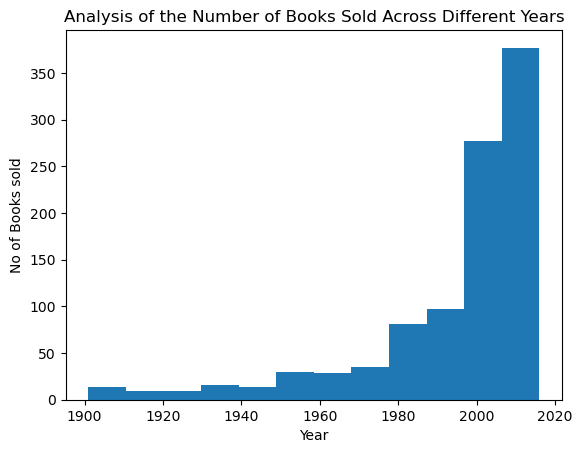

In [9]:
# Using Matplotlib to add titles, labels, or customize the appearance of the plots.
# Create visualizations to understand the data
#Understanding no of books sold every year
plt.hist(x=df['Publishing Year'],bins=12)
plt.xlabel("Year")
plt.ylabel("No of Books sold")
plt.title("Analysis of the Number of Books Sold Across Different Years")

<Axes: xlabel='genre'>

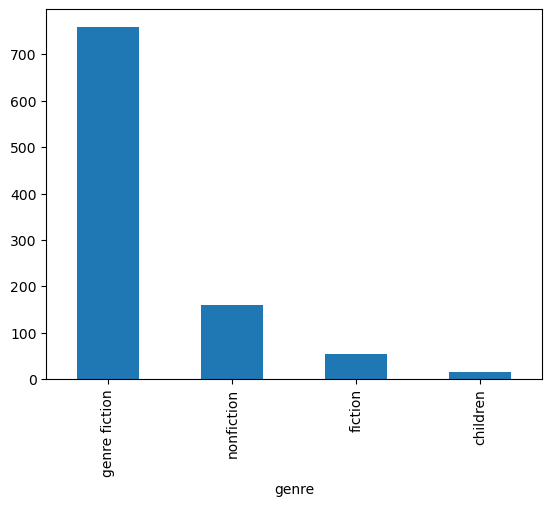

In [10]:
#Plotting a bar graph to understand no of sold in each genre
df.genre.value_counts().plot(kind='bar')


In [11]:
#Finding average rating of each author
df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending=False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

In [12]:
#finding average book rating in each genere
df.groupby('genre')['Book_average_rating'].mean().sort_values(ascending=False)

genre
fiction          4.040926
children         4.033333
nonfiction       4.020625
genre fiction    4.002543
Name: Book_average_rating, dtype: float64

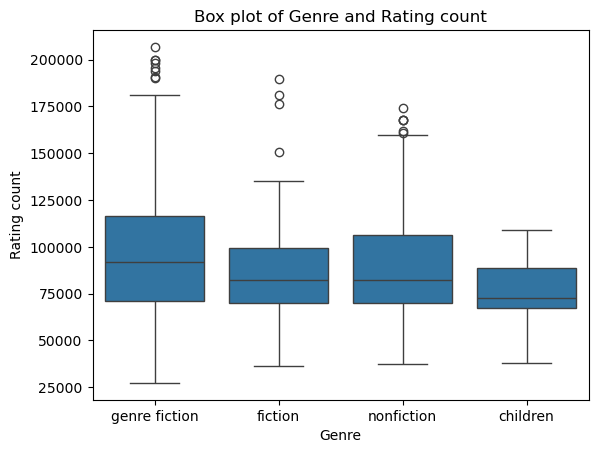

In [13]:
# Using Seaborn to create visualizations for analyzing data distributions and relationships.
#Boxplot to study outliers in genre and rating counts
sns.boxplot(x='genre',y='Book_ratings_count',data=df)
plt.xlabel("Genre")
plt.ylabel("Rating count")
plt.title('Box plot of Genre and Rating count')
plt.show()

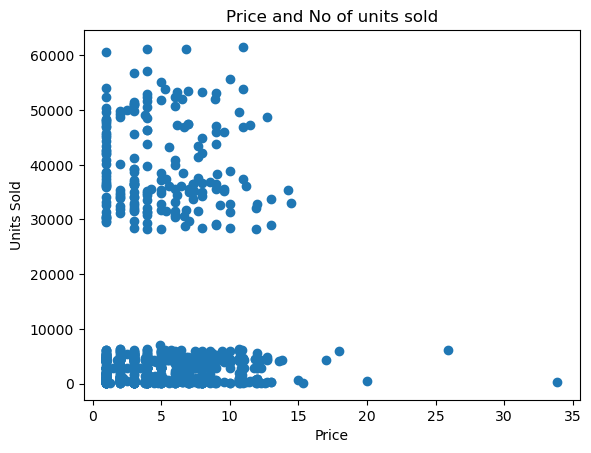

In [14]:
# Using Matplotlib to add titles, labels, or customize the appearance of the plots.
#Scatterplot to understand units sold in relation to price
plt.scatter(x=df['sale price'],y=df['units sold'])
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.title('Price and No of units sold')
plt.show()

In [15]:
#Replacing all dialects of engish and just english
df['language_code'] = df['language_code'].replace(['en-US','en-CA','en-GB'], 'eng')


In [16]:
#No of books in each language
df['language_code'].value_counts()



language_code
eng    932
fre      4
spa      2
ara      2
nl       1
Name: count, dtype: int64

In [17]:
#Percent of No of books in each language
df['language_code'].value_counts(normalize=True)*100

language_code
eng    99.043571
fre     0.425080
spa     0.212540
ara     0.212540
nl      0.106270
Name: proportion, dtype: float64

In [18]:
#Revenue generated by each publisher
df.groupby("Publisher ")['publisher revenue'].sum()

Publisher 
Amazon Digital Services,  Inc.          141767.772
Hachette Book Group                     107410.968
HarperCollins Christian Publishing        2135.670
HarperCollins Publishers                121769.814
HarperCollins Publishing                  2830.806
Macmillan                                31249.830
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Simon and Schuster Digital Sales Inc     46858.206
Name: publisher revenue, dtype: float64

In [19]:
df

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",eng,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,eng,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,eng,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


<Axes: xlabel='Publisher '>

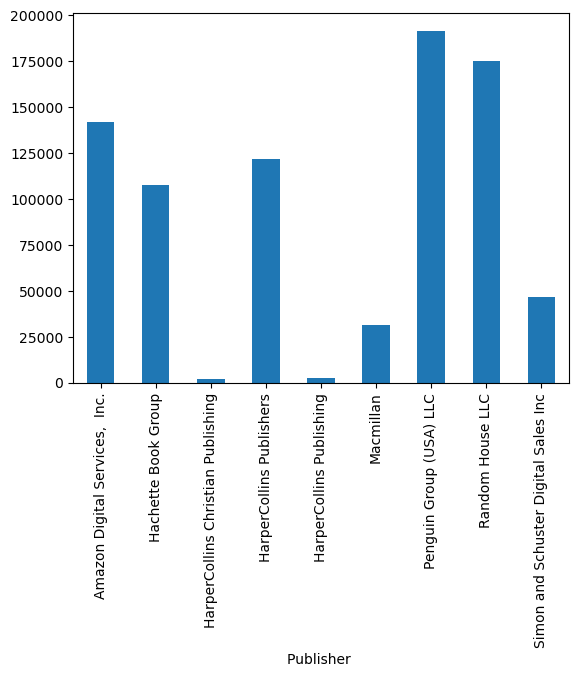

In [20]:
#bar graph of revenue generated by each publisher
df.groupby('Publisher ')['publisher revenue'].sum().plot(kind='bar')


In [26]:
#No of ratings by author counts
df.groupby('Author_Rating')['Book_ratings_count'].sum().sort_values(ascending=False)

Author_Rating
Intermediate    58406557
Excellent       28158413
Famous           4718172
Novice           2444917
Name: Book_ratings_count, dtype: int64

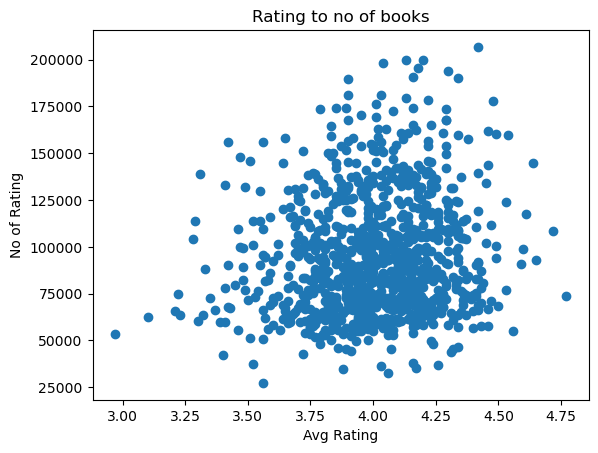

In [27]:
# Using Matplotlib to add titles, labels, or customize the appearance of the plots.
#Plot to understand how good the book was, by plotting a scatterplot of average rating to no of ratings
plt.scatter(x=df['Book_average_rating'],y=df['Book_ratings_count'])
plt.xlabel("Avg Rating")
plt.ylabel("No of Rating")
plt.title("Rating to no of books")
plt.show()

In [35]:
#Finding total sales by each author
total_sales_by_author=df.groupby('Author')['gross sales'].sum().sort_values(ascending=False).head(10)

In [36]:
total_sales_by_author

Author
Harper Lee                47795.00
Stephen King              43322.65
David Sedaris             42323.41
Charlaine Harris          39453.08
Laini Taylor              38278.41
Unknown, Seamus Heaney    34160.00
Sarah Dessen              31034.85
Colleen Hoover            29706.14
C.S. Lewis                28972.57
Jeffrey Eugenides         27984.38
Name: gross sales, dtype: float64

<Axes: xlabel='Publishing Year'>

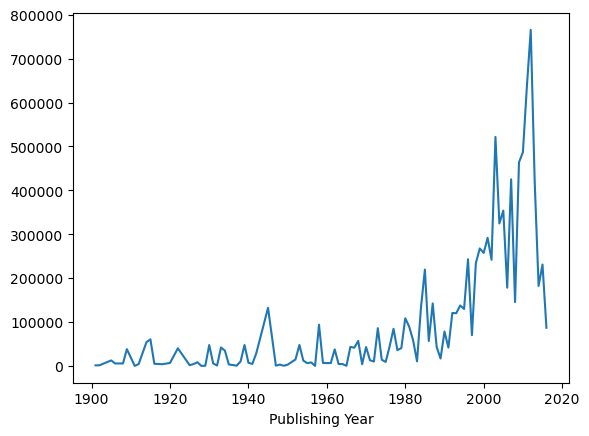

In [40]:
#A line graph of no of books sold every year
df.groupby('Publishing Year')['units sold'].sum().plot(kind='line')
